# Photometry in pycoco

---------------------

## Introduction
This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting photometry in **`pycoco`**, as a companion to the **`c`** code **`CoCo`**.

**`CoCo`** takes photometry data in one input phot file. **`pycoco`** can be used to (*hopefully*) easily wrangle your exisiting photometry into the correct format.

In [1]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.pyc'>

## Using `PhotometryClass`
----

### `PhotometryClass` methods and variables

Photometry in **`pycoco`** is handled using **`PhotometryClass`** which has the methods and variables:

**`PhotometryClass.__init__`**

**`PhotometryClass._get_data_directory`**

**`PhotometryClass._combine_phot`**


**`PhotometryClass.set_data_directory`**

**`PhotometryClass.load_phot_from_file`**

**`PhotometryClass.load_phot_ap_tables`**

**`PhotometryClass.load`**

**`PhotometryClass.save`**

**`PhotometryClass.plot`**

**`PhotometryClass.save_phot`**


**`PhotometryClass._default_data_dir_path`**

----
# I/O

## File Input
----
### Input from Files for each Filter

You can load in phot files one by one, or you can use the **`PhotometryClass.load_phot_from_files()`** method, to find all of those that match a SN, or you can load in an appropriately formatted file with P. 

In [2]:
P = pcc.PhotometryClass()

In [3]:
P.load_phot_from_files()

/Users/berto/Code/verbose-enigma/pycoco/__init__.py:1043: UserWarning: Provide a SN name
  warnings.warn("Provide a SN name")


Oops! We need to provide a SN name!

In [4]:
P.load_phot_from_files(snname = 'SN2005bf')

/Users/berto/Code/verbose-enigma/pycoco/__init__.py:2949: UserWarning: Found /Users/berto/Code/verbose-enigma/testdata/lc/SN2005bf.dat - you could just read that in.
  warnings.warn("Found " + os.path.join(path,snname + file_type) + " - you could just read that in.")


['iPTF13bvn.dat', 'README', 'SN1993J.dat', 'SN1994I.dat', 'SN1996cb.dat', 'SN1998bw.dat', 'SN1999dn.dat', 'SN2002ap.dat', 'SN2003jd.dat', 'SN2004aw.dat', 'SN2005bf.dat', 'SN2005hg.dat', 'SN2006aj.dat', 'SN2007C.dat', 'SN2007gr.dat', 'SN2007uy.dat', 'SN2007Y.dat', 'SN2008ax.dat', 'SN2008bo.dat', 'SN2008D.dat', 'SN2009bb.dat', 'SN2009er.dat', 'SN2009iz.dat', 'SN2009jf.dat', 'SN2010al.dat', 'SN2010as.dat', 'SN2011bm.dat', 'SN2011dh.dat', 'SN2011ei.dat', 'SN2011fu.dat', 'SN2012ap.dat', 'SN2013ge.dat']
searching for SN2005bf.dat
Found: 
['iPTF13bvn.dat', 'README', 'SN1993J.dat', 'SN1994I.dat', 'SN1996cb.dat', 'SN1998bw.dat', 'SN1999dn.dat', 'SN2002ap.dat', 'SN2003jd.dat', 'SN2004aw.dat', 'SN2005bf.dat', 'SN2005hg.dat', 'SN2006aj.dat', 'SN2007C.dat', 'SN2007gr.dat', 'SN2007uy.dat', 'SN2007Y.dat', 'SN2008ax.dat', 'SN2008bo.dat', 'SN2008D.dat', 'SN2009bb.dat', 'SN2009er.dat', 'SN2009iz.dat', 'SN2009jf.dat', 'SN2010al.dat', 'SN2010as.dat', 'SN2011bm.dat', 'SN2011dh.dat', 'SN2011ei.dat', 'SN2011

FilterMismatchError: There is a mismatch between the filter filename and that in the photometry file

The operation has run with `verbose = True`, so it has spat out quite a bit of information. Namely, it found 6 files in the (default) data directory. 
5 of these matched the specified SN name (SN2005bf). The full filepaths of these was printed as the files were iterated over and loaded in to **`astropy`** tables. The filters from the file data and file names are printed, and all seem to match.

if a warning raised, it is because a file matching the naming convention ($SNNAME.dat) of correctly formatted datafile was found, and that might be easier to deal with!  - (NO LONGER TRUE AS OF 15-04-17)

Let's take a look at what is now in our **`PhotometryClass`** instance:

In [43]:
P.__dict__.keys()

['phot',
 'filter_directory',
 '_default_filter_dir_path',
 'data_directory',
 'data_filters',
 '_default_data_dir_path',
 'data']

Let's look at the data that was loaded in:

In [44]:
P.data.keys()

['B', 'SDSS_g', 'V', 'SDSS_r', 'SDSS_i']

In [45]:
P.data['B'].show_in_notebook(display_length = 10)

idx,MJD,flux,flux_err,filter,t
,d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),,
0,53467.7,3.739383e-16,5.510559e-18,B,53467.7
1,53468.6,4.119078e-16,6.070097e-18,B,53468.6
2,53471.24492,5.340722e-16,9.837974e-18,B,53471.24492
3,53472.24774,5.791619e-16,1.013513e-17,B,53472.24774
4,53472.6,5.613064e-16,8.271717e-18,B,53472.6
5,53473.21264,5.981361e-16,1.101807e-17,B,53473.21264
6,53473.22608,6.047836e-16,1.114053e-17,B,53473.22608
7,53473.6,5.872189e-16,8.653577e-18,B,53473.6
8,53474.21104,6.171632e-16,1.080014e-17,B,53474.21104


This is good - all of the found photometry has been read in. 

## Input From Astropy Tables
----
If you have photometry that is already in **`astropy`** tables, then you can load it in using **`PhotometryClass.load_phot_ap_tables()`**. There must be columns labelled `MJD`, `flux`, `flux_err` and `filter`.

## Input From Single **`CoCo`**-format file
----
**`CoCo`** takes as an input, one photometry file, with all of the data inside it. So far, we have used **`pycoco`** to read in several *different* photometry files. 

The **`CoCo`** standard format is the same columns as the individual ones (`MJD`, `flux`, `flux_err` and `filter`), but all of the photometry is in together. When using  **`PhotometryClass.load_phot_from_files()`**, an **`astropy`** table matching this is generated, and stored in **`PhotometryClass.phot`**. 

In [46]:
P.phot.show_in_notebook(display_length = 10)

idx,MJD,flux,flux_err,filter
,d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
0,53459.8,5.25291e-17,9.531075e-18,SDSS_r
1,53466.8,1.856949e-16,1.060394e-17,SDSS_r
2,53467.7,3.739383e-16,5.510559e-18,B
3,53467.7,1.256609e-16,1.736069e-18,SDSS_i
4,53467.7,3.654265e-16,5.048553e-18,SDSS_g
5,53467.7,2.10281e-16,2.905139e-18,SDSS_r
6,53467.7,2.64972e-16,3.660724e-18,V
7,53468.6,1.306171e-16,2.045147e-18,SDSS_i
8,53468.6,2.210039e-16,3.053282e-18,SDSS_r


It is ordered by time (MJD).

If the photometry is already in this format, and you want to interact with it, you can use **`pycoco.load()`**, which is a wrapper for **`pycoco.load_formatted_phot()`**.

In [47]:
P_new = pcc.load("/Users/berto/Code/verbose-enigma/testdata/lc/SN2005bf.dat", verbose = False)
P_new.phot.show_in_notebook(display_length = 10)

idx,MJD,flux,flux_err,filter
,d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
0,53459.8,5.25291e-17,9.53107e-18,SDSS_r
1,53466.8,1.85695e-16,1.06039e-17,SDSS_r
2,53467.7,3.73938e-16,5.51056e-18,B
3,53467.7,1.25661e-16,1.73607e-18,SDSS_i
4,53467.7,3.65426e-16,5.04855e-18,SDSS_g
5,53467.7,2.10281e-16,2.90514e-18,SDSS_r
6,53467.7,2.64972e-16,3.66072e-18,V
7,53468.6,1.30617e-16,2.04515e-18,SDSS_i
8,53468.6,2.21004e-16,3.05328e-18,SDSS_r


This uses **`PhotometryClass.unpack()`** to convert back from this format to individual filter files, putting them in an `OrderedDict`, **`PhotometryClass.data`**.

In [48]:
P_new.unpack()

In [49]:
P_new.data.keys()

['B', 'SDSS_g', 'SDSS_i', 'SDSS_r', 'V']

In [50]:
P_new.data_filters

OrderedDict([('B', <pycoco.FilterClass instance at 0x10f83bc20>),
             ('SDSS_g', <pycoco.FilterClass instance at 0x10ff03d88>),
             ('SDSS_i', <pycoco.FilterClass instance at 0x1066f9200>),
             ('SDSS_r', <pycoco.FilterClass instance at 0x110993b48>),
             ('V', <pycoco.FilterClass instance at 0x110993c68>)])

# File Output
----

File out to a directory of choice can be done using **`PhotometryClass.save()`**, using the default directory: 

In [51]:
P.save("SN2005bf.dat", squash = True)

has data
No directory specified, assuming /Users/berto/Code/verbose-enigma/testdata/lc/
Overwriting /Users/berto/Code/verbose-enigma/testdata/lc/SN2005bf.dat


# Plotting Photometry
----

Once the photometry is loaded in, you can view it using **`PhotometryClass.plot()`**, which accepts **`matplotlib.pyplot`** **`args`** and **`kwargs`**.

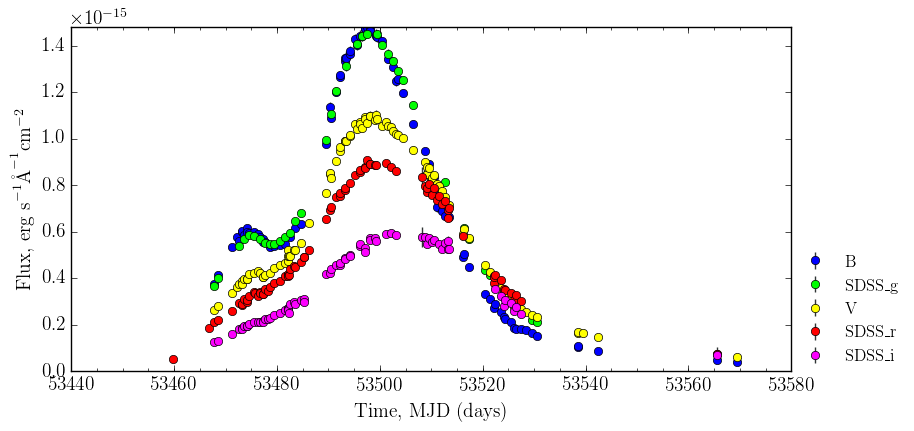

In [52]:
P.plot()

Looks good!

## Associating **`FilterClass`** with Photometry
----

What we will demonstrate now is associating **`FilterClass`** with the photometry. **`PhotometryClass`** knows about the default filter directory (but another can be specified using **`PhotometryClass.set_filter_directory`**):

In [53]:
P.filter_directory

'/Users/berto/Code/CoCo/data/filters'

The **`PhotometryClass.load_phot_from_files()`** and **`PhotometryClass.load_formatted_phot()`** (the latter is used by **`pcc.load()`**) methods automatically search the filter directory for the appropriate filters using **`pcc.load_filter()`**, and loads them in. For more on **`pycocoo.FilterClass`** see `pycoco_adding_filters.ipynb`.

If we take a look, we can see that we have 5 **`FilterClass`** instances, one for each of the photometry files.

In [54]:
P.data_filters

OrderedDict([('B', <pycoco.FilterClass instance at 0x10977cb90>),
             ('SDSS_g', <pycoco.FilterClass instance at 0x10ff15d88>),
             ('V', <pycoco.FilterClass instance at 0x10fef2098>),
             ('SDSS_r', <pycoco.FilterClass instance at 0x10fc0a488>),
             ('SDSS_i', <pycoco.FilterClass instance at 0x10ff153f8>)])

We can have a look at the spectral coverage of the photometry by using the **`PhotometryClass.plot_filters()`** method:

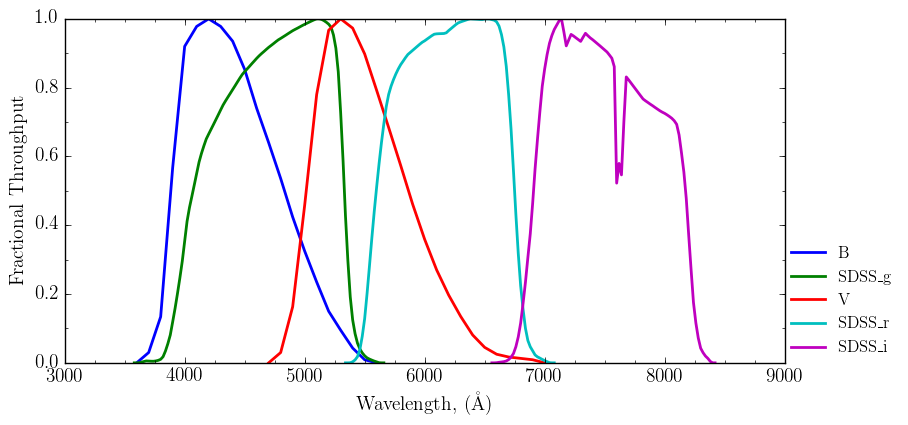

In [55]:
P.plot_filters(legend = True)

This looks good! We have good spectral coverage.